In [1]:
#!pip install pandas-datareader

# install the pacckag

DataReader function, which is capable of connecting to a financial news server
such as Yahoo, Google, and many others, and then downloading the data that you will
need for the example of this book. DataReader takes four arguments in this example:
1. The first one is the symbol (our example uses GOOG for Google) you would like to
use for analysis.
2. The second specifies the source for retrieving the data, and then you will specify
the range of days to get the data.
3. The third specifies the starting data from which to fetch historical data.
4. The fourth and final argument specifies the end data for the historical data series

In [6]:
import pandas_datareader as pdr
from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2022-01-01'
goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)

import pandas as pd
import numpy as np

In [9]:
goog_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192
...,...,...,...,...,...,...
2021-12-27,2968.530029,2945.000000,2949.270020,2961.280029,662800.0,2961.280029
2021-12-28,2967.489990,2918.709961,2967.489990,2928.959961,931200.0,2928.959961
2021-12-29,2943.675049,2910.090088,2928.590088,2930.090088,851100.0,2930.090088


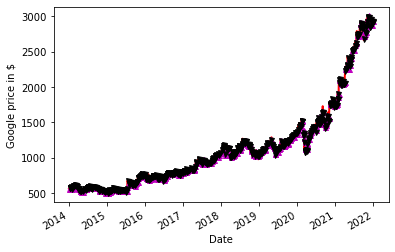

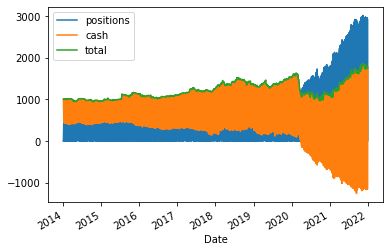

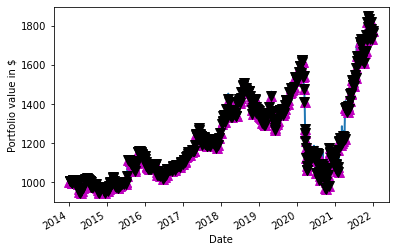

In [7]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'][:] = np.where(goog_data_signal['daily_difference'][:] > 0, 1.0, 0.0)

goog_data_signal['positions'] = goog_data_signal['signal'].diff()

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='k')

#plt.show()


# Set the initial capital
initial_capital= float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)


positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio.plot()
plt.show()


fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[goog_data_signal.positions == 1.0].index,portfolio.total[goog_data_signal.positions == 1.0],'^', markersize=10, color='m')
ax1.plot(portfolio.loc[goog_data_signal.positions == -1.0].index,portfolio.total[goog_data_signal.positions == -1.0],'v', markersize=10, color='k')
plt.show()

In [10]:
def company_stock_overview(ticker, data_source, start_date, end_date):
    """
    the purpose of the function is to get the stock market data and delivering three plots 
    inputs:
    ticker name of the company
    source of the data example yahoo
    start date yyyy-mm-dd
    end date
    
    """
    
    df = data.DataReader(ticker, data_source, start_date, end_date)
    
    
    df_signal = pd.DataFrame(index=df.index)
    df_signal['price'] = df['Adj Close']
    df_signal['daily_difference'] = df_signal['price'].diff()
    df_signal['signal'] = 0.0
    df_signal['signal'][:] = np.where(df_signal['daily_difference'][:] > 0, 1.0, 0.0)

    df_signal['positions'] = df_signal['signal'].diff()

    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax1 = fig.add_subplot(111, ylabel='price in $')
    df_signal['price'].plot(ax=ax1, color='r', lw=2.)

    ax1.plot(df_signal.loc[df_signal.positions == 1.0].index,
             df_signal.price[df_signal.positions == 1.0],
             '^', markersize=5, color='m')

    ax1.plot(df_signal.loc[df_signal.positions == -1.0].index,
             df_signal.price[df_signal.positions == -1.0],
             'v', markersize=5, color='k')

    #plt.show()


    # Set the initial capital
    initial_capital= float(1000.0)

    positions = pd.DataFrame(index=df_signal.index).fillna(0.0)
    portfolio = pd.DataFrame(index=df_signal.index).fillna(0.0)


    positions['GOOG'] = df_signal['signal']
    portfolio['positions'] = (positions.multiply(df_signal['price'], axis=0))
    portfolio['cash'] = initial_capital - (positions.diff().multiply(df_signal['price'], axis=0)).cumsum()
    portfolio['total'] = portfolio['positions'] + portfolio['cash']
    portfolio.plot()
    plt.show()


    fig = plt.figure()
    ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
    portfolio['total'].plot(ax=ax1, lw=2.)
    ax1.plot(portfolio.loc[df_signal.positions == 1.0].index,portfolio.total[df_signal.positions == 1.0],'^', markersize=10, color='m')
    ax1.plot(portfolio.loc[df_signal.positions == -1.0].index,portfolio.total[df_signal.positions == -1.0],'v', markersize=10, color='k')
    plt.show()

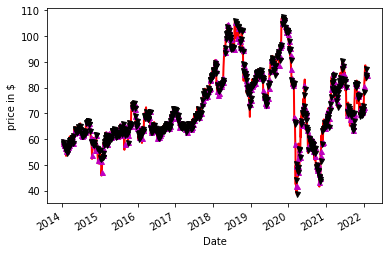

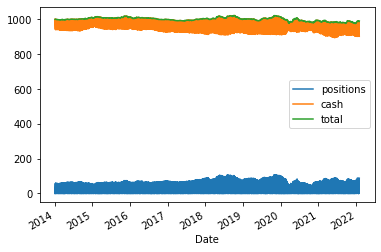

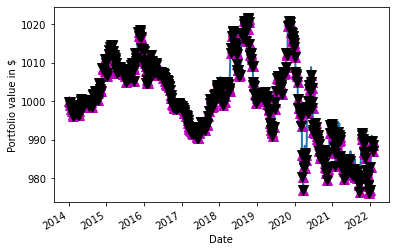

In [11]:
company_stock_overview('PSX', 'yahoo','2014-01-01' , '2022-02-01')